# Introduction to ggplot

In [110]:
#Import ggplot2 library
library(ggplot2)
library(dplyr)
library(lubridate) # date operations
library(gridExtra)

# 1. [Scatter plots](https://ggplot2.tidyverse.org/reference/geom_point.html)


## 1.1 Import internal practice data set

In [3]:
head(mtcars, 5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


### 1.2.1  Basic scatter 
- ggplot(DATAFRAME, aes(x=column_name_1, y= column_name_2) + geom_point()

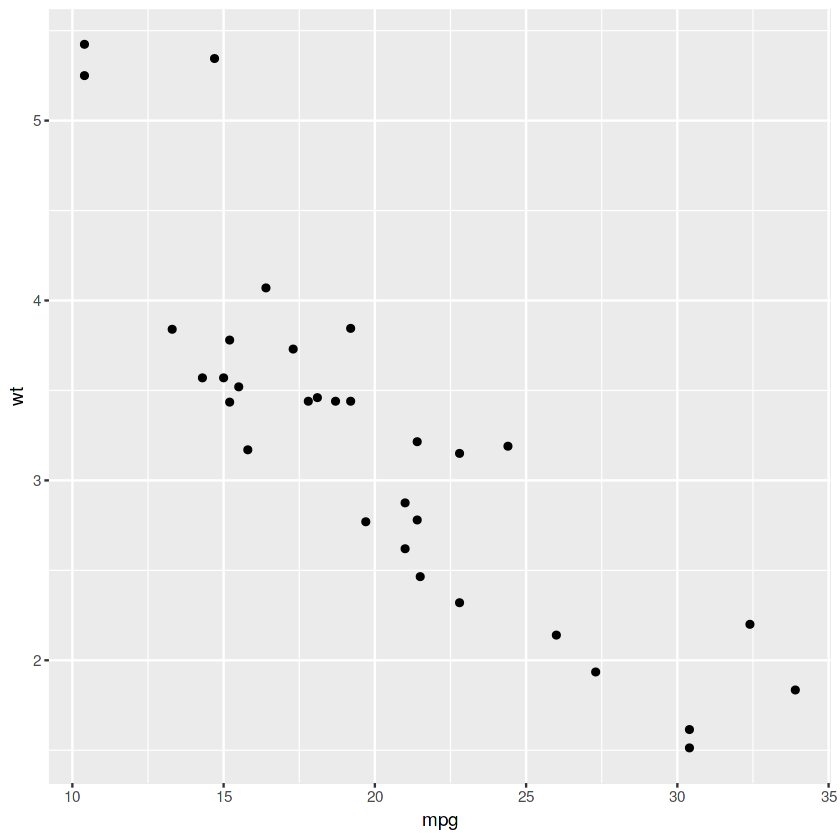

In [4]:
ggplot(mtcars, aes(x = mpg, y = wt)) + 
geom_point()

### 1.2.2 Scatter plot with title 

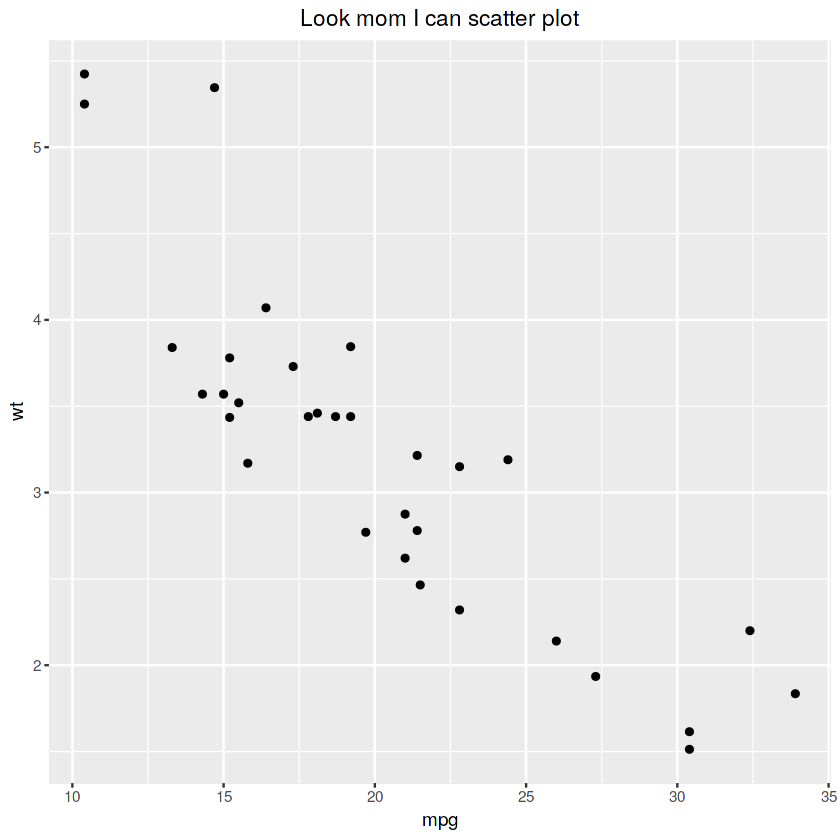

In [5]:
ggplot(mtcars, aes(x = mpg, y = wt)) + 
geom_point()+
ggtitle('Look mom I can scatter plot')+ theme(plot.title = element_text(hjust = 0.5)) #title

### 1.2.3 Scatter plot with dots transparent and red

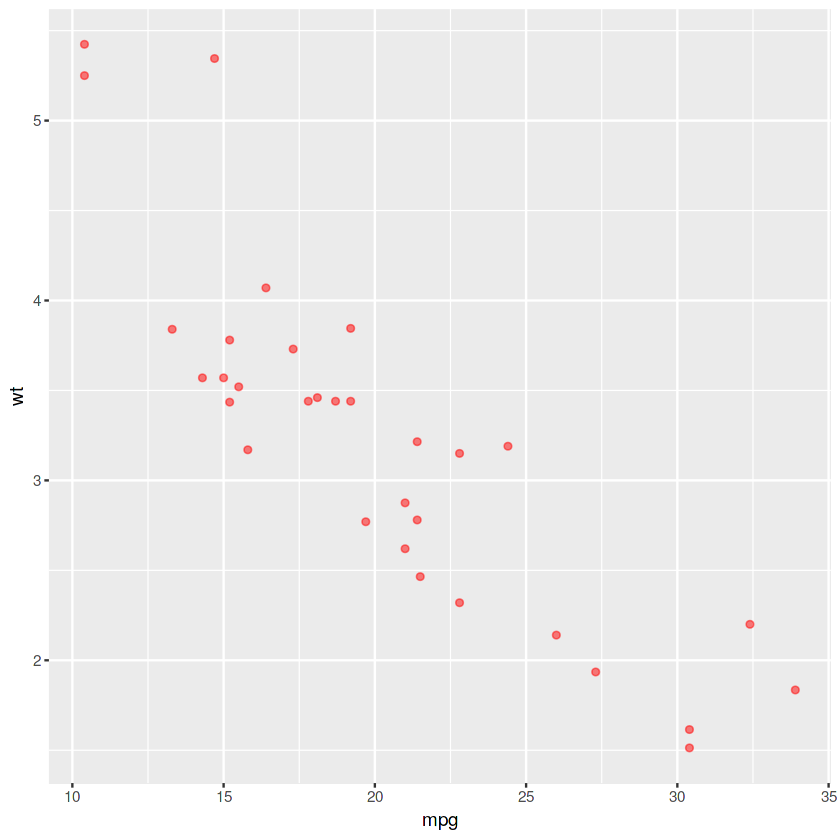

In [6]:
ggplot(mtcars, aes(x = mpg, y = wt)) + 
geom_point(alpha=.5, color='red')

# 2. [Bar charts](https://ggplot2.tidyverse.org/reference/geom_bar.html)

## 2.1 Import data set

In [7]:
df = read.csv("global_covid.csv")
head(df,3)

,X,name,confirm,suspect,dead,deadRate,showRate,heal,healRate,showHeal
,<int>,<fct>,<int>,<int>,<int>,<dbl>,<lgl>,<int>,<dbl>,<lgl>
1,1,China,83039,88,3340,4.02,FALSE,77361,93.16,TRUE
2,2,United States,143071,0,2513,1.76,FALSE,4856,3.39,FALSE
3,3,Italy,97689,0,10779,11.03,FALSE,13030,13.34,FALSE


## 2.2 Basic bar chart

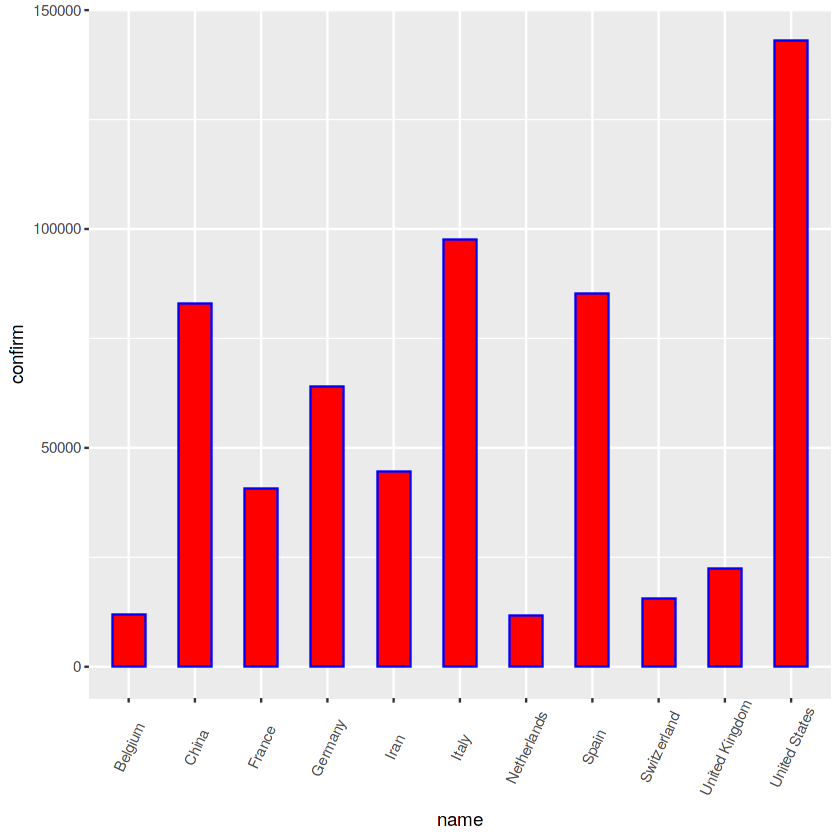

In [8]:
ggplot(df%>%filter(confirm>10000), aes(x=name, y=confirm)) + 
geom_bar(stat="identity", width=.5, fill='red',color='blue')+  
theme(axis.text.x = element_text(angle=65, vjust=0.6))

## 2.3 Ordered bar chart

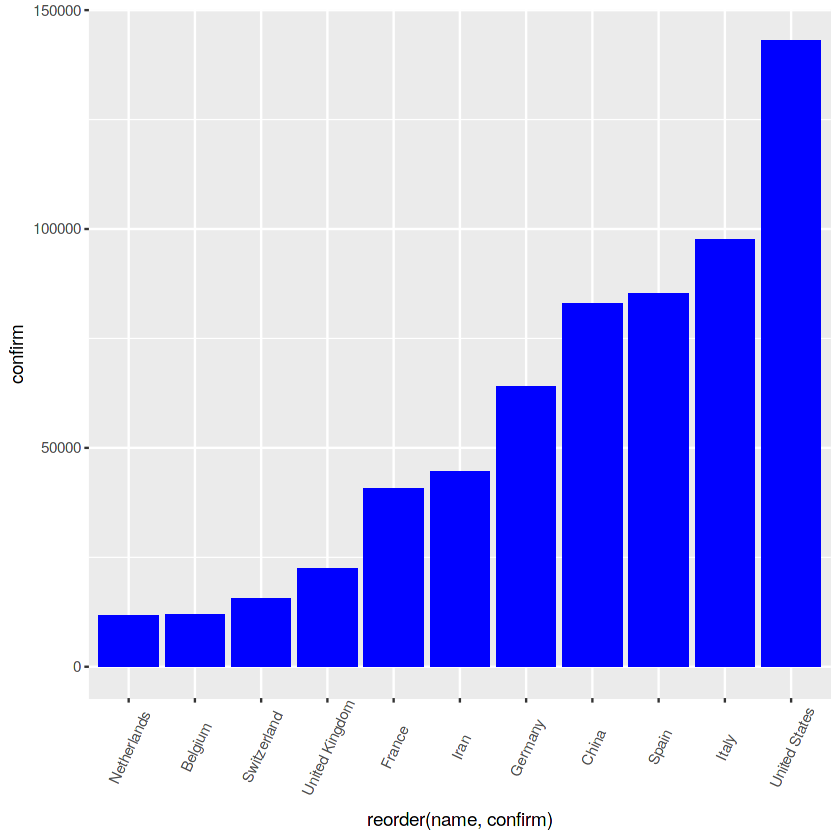

In [9]:
ggplot(df%>%arrange(desc(confirm))%>%filter(confirm>10000), aes(x=reorder(name, confirm), y=confirm)) + 
geom_bar(stat="identity", fill='blue')+  
theme(axis.text.x = element_text(angle=65, vjust=0.6))

# 3. [Line charts](https://www.r-graph-gallery.com/279-plotting-time-series-with-ggplot2.html)

In [68]:
df = read.csv("Covid_TS_global.csv")
df$date = as.Date(df$date)
head(df, 2)

,X,country,date,confirmed,deaths,recovered
,<int>,<fct>,<date>,<int>,<int>,<int>
1,1,Afghanistan,2020-01-22,0,0,0
2,2,Afghanistan,2020-01-23,0,0,0


## 3.1 One line

In [69]:
japan = df %>% filter(country=='Japan')
head(japan,2)

,X,country,date,confirmed,deaths,recovered
,<int>,<fct>,<date>,<int>,<int>,<int>
1,6709,Japan,2020-01-22,2,0,0
2,6710,Japan,2020-01-23,2,0,0


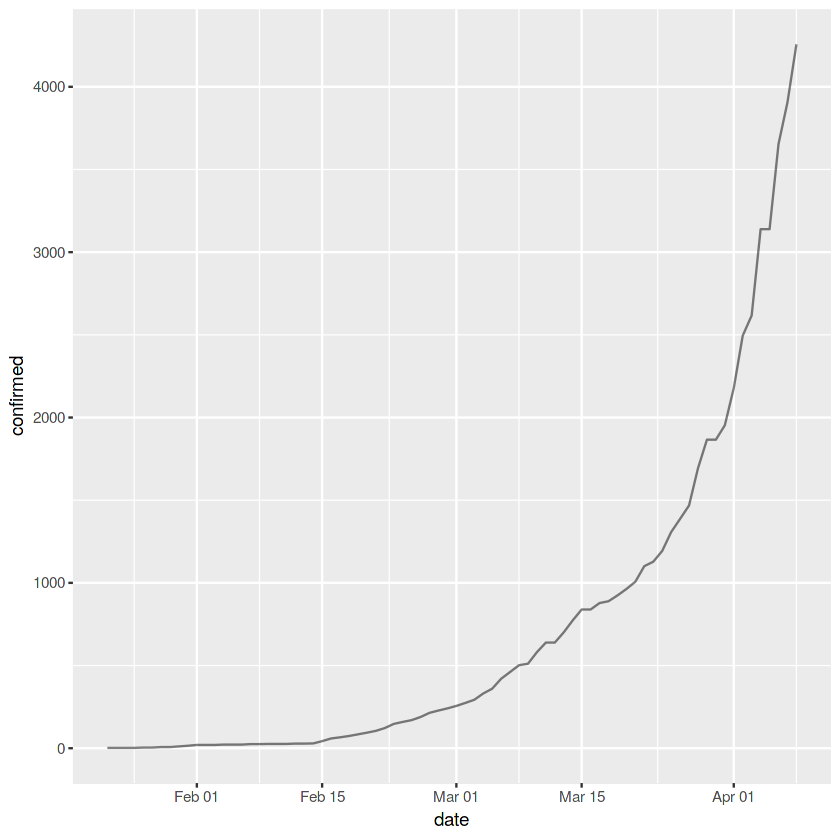

In [70]:
japan %>% ggplot(aes(x=date, y=confirmed)) + geom_line(alpha=0.5)

## 3.2 Multiple lines

### 3.2.1 First look for the U.S

In [93]:
#Look for the United States
df %>% filter(grepl("U", country)) %>% select(country) %>% unique()

,country
,<fct>
1,Uganda
79,Ukraine
157,United Arab Emirates
235,United Kingdom
313,Uruguay
391,US
469,Uzbekistan


### 3.2.2 Plot with mulitple color for different lines

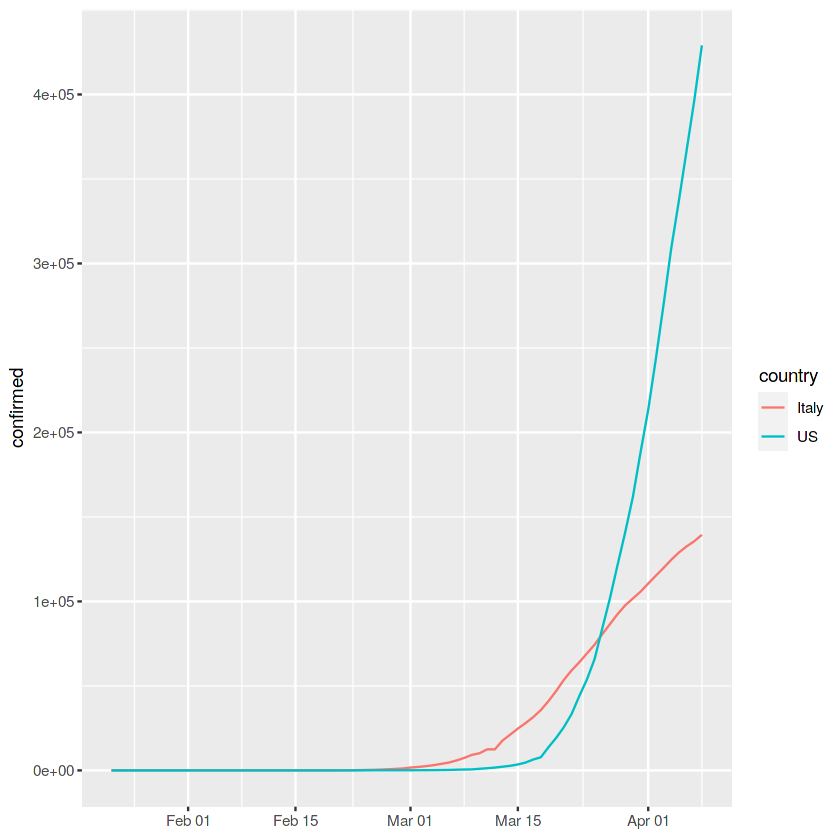

In [103]:
df %>% filter(country=='Italy'| country=="US") %>% 
ggplot(aes(x=date, y=confirmed)) + geom_line(aes(color=country))+ 
theme(axis.title.x=element_blank())

# 4. Multiple graphs

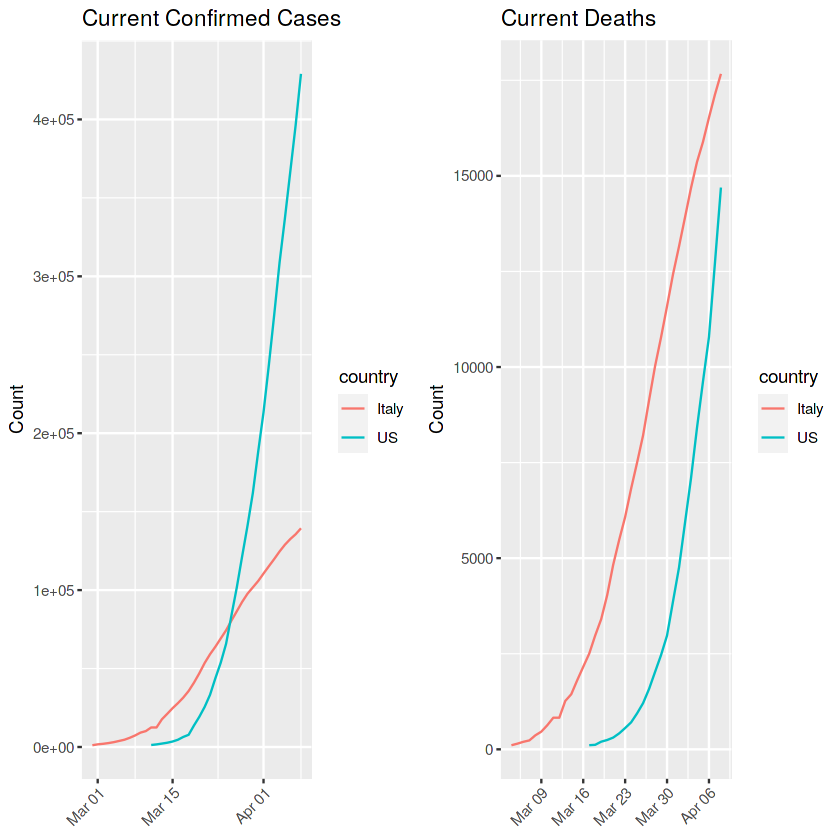

In [114]:
plot1 = df %>% filter(confirmed>1000)  %>%  filter(country=='Italy'| country=="US") %>% 
ggplot(aes(x=date, y=confirmed)) + geom_line(aes(color=country))+ 
theme(axis.title.x=element_blank())+
xlab('') + ylab('Count') + labs(title='Current Confirmed Cases') + theme(axis.text.x=element_text(angle=45, hjust=1))

plot2 = df %>% filter(deaths>100) %>%filter(country=='Italy'| country=="US") %>% 
ggplot(aes(x=date, y=deaths)) + geom_line(aes(color=country))+ 
theme(axis.title.x=element_blank())+
xlab('') + ylab('Count') + labs(title='Current Deaths') + theme(axis.text.x=element_text(angle=45, hjust=1))

grid.arrange(plot1, plot2, ncol=2)